<a href="https://colab.research.google.com/github/suhanask/Assignments_ExcelR_Suhana/blob/main/Forecasting_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
data.describe()

,Month,Passengers
count,96,96.000000
mean,1998-12-16 05:00:00,213.708333
min,1995-01-01 00:00:00,104.000000
25%,1996-12-24 06:00:00,156.000000
50%,1998-12-16 12:00:00,200.000000
75%,2000-12-08 18:00:00,264.750000
max,2002-12-01 00:00:00,413.000000
std,NaN,71.918216


In [5]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

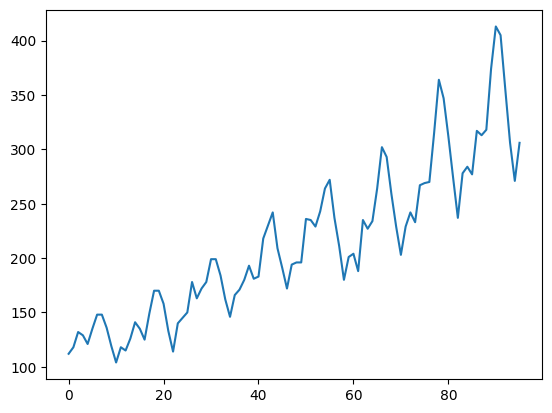

In [6]:
data.Passengers.plot()
plt.show()

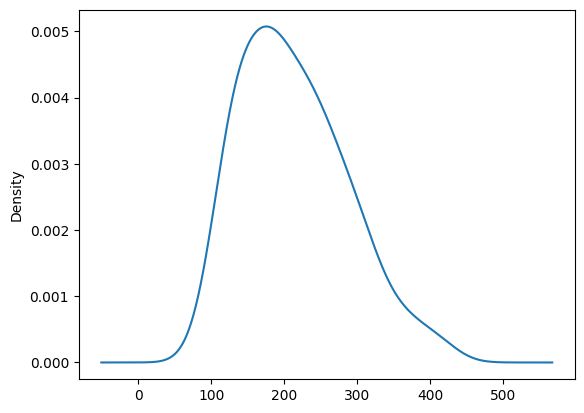

In [7]:
data.Passengers.plot(kind='kde')
plt.show()

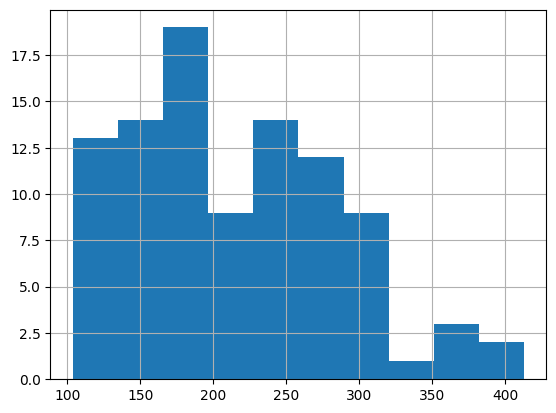

In [8]:
data.Passengers.hist()
plt.show()

In [9]:
data.rename(columns={'Month':'Date'}, inplace=True)

In [10]:
data['Month']= data.Date.dt.strftime('%b')
data['Year']= data.Date.dt.strftime('%y')
data['Day']= data.Date.dt.strftime('%d')

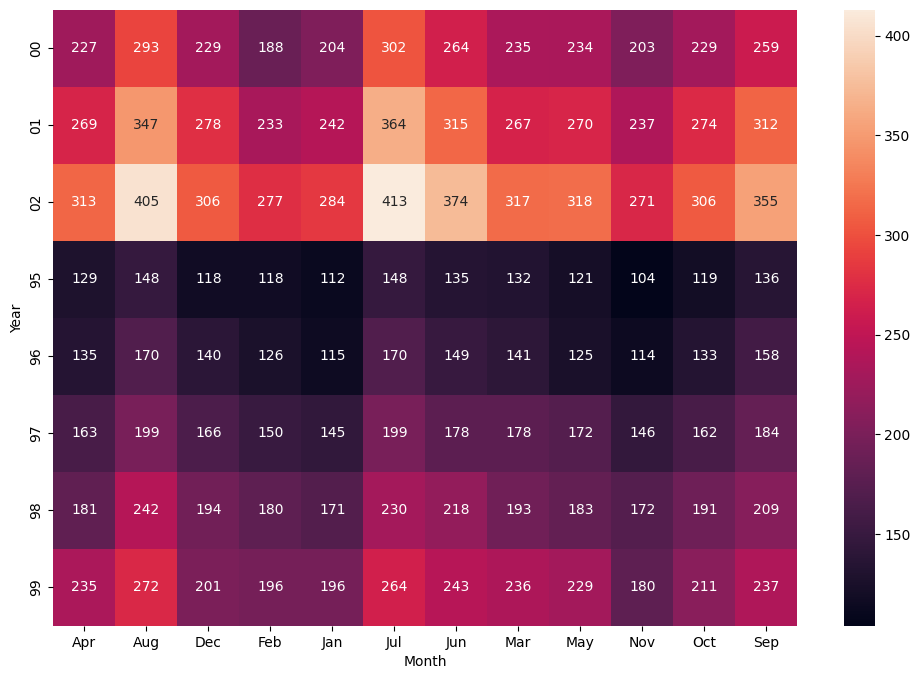

In [11]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data, values='Passengers', index='Year', columns='Month',aggfunc='mean' , fill_value=0)
sns.heatmap(heatmap_y_month, annot=True, fmt='g')
plt.show();

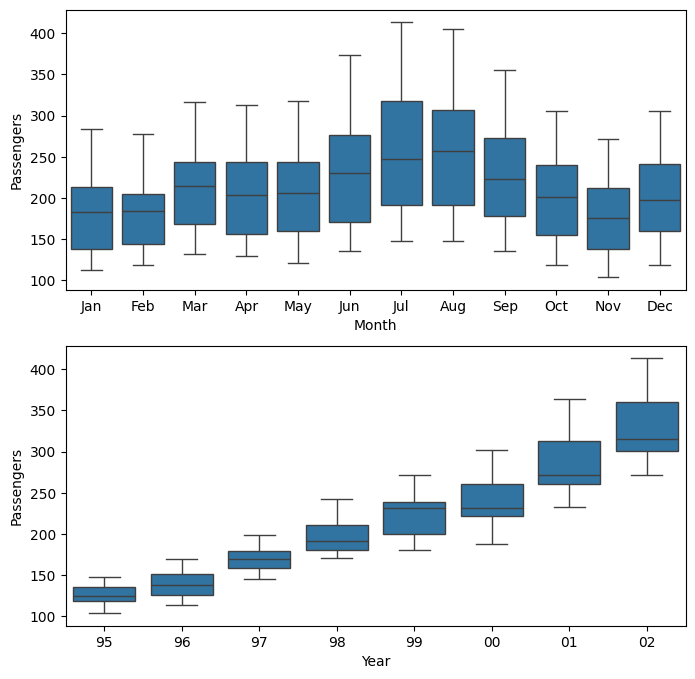

In [12]:
plt.figure(figsize=(8,8))
plt.subplot(211)
sns.boxplot(x='Month',y='Passengers',data=data)
plt.subplot(212)
sns.boxplot(x='Year', y='Passengers', data=data)
plt.show();

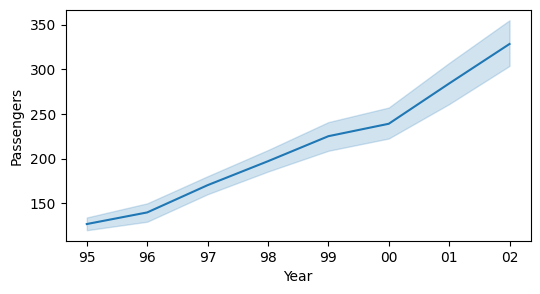

In [13]:
plt.figure(figsize=(6,3))
sns.lineplot(x='Year', y='Passengers', data=data)
plt.show()

In [14]:
data['t']= np.arange(0,96)
data['t_square']= data['t']*data['t']
data['log_Passengers']= np.log(data['Passengers'])

In [15]:
month_dummies = pd.get_dummies(data['Month'])
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
91,False,True,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,False,False,True
93,False,False,False,False,False,False,False,False,False,False,True,False
94,False,False,False,False,False,False,False,False,False,True,False,False


In [16]:
data1= pd.concat([data, month_dummies], axis=1)
data1.head()

,Date,Passengers,Month,Year,Day,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,95,01,0,0,4.718499,False,False,False,False,True,False,False,False,False,False,False,False
1,1995-02-01,118,Feb,95,01,1,1,4.770685,False,False,False,True,False,False,False,False,False,False,False,False
2,1995-03-01,132,Mar,95,01,2,4,4.882802,False,False,False,False,False,False,False,True,False,False,False,False
3,1995-04-01,129,Apr,95,01,3,9,4.859812,True,False,False,False,False,False,False,False,False,False,False,False
4,1995-05-01,121,May,95,01,4,16,4.795791,False,False,False,False,False,False,False,False,True,False,False,False


In [17]:
Train =data1.head(80)
Test= data1.tail(16)

In [18]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

linear_model=smf.ols('Passengers~t', data=Train).fit()
pred_linear =pd.Series(linear_model.predict(Test['t']))
rmse_linear= np.sqrt(mean_squared_error(Test['Passengers'],pred_linear))
rmse_linear

47.54262406772675

In [19]:
exp_model = smf.ols('log_Passengers~t', data=Train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(Test['t'])))
rmse_exp = np.sqrt(mean_squared_error(Test['Passengers'],np.exp(pred_exp)))
rmse_exp

43.79373939334322

In [20]:
quad_model = smf.ols('Passengers~t+t_square', data=Train).fit()
pred_quad = pd.Series(quad_model.predict(Test))
rmse_quad = np.sqrt(mean_squared_error(Test['Passengers'],pred_quad))
rmse_quad

43.65440369584217

In [21]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea = add_sea.predict(Test)
rmse_add_sea = np.sqrt(mean_squared_error(Test['Passengers'],pred_add_sea))
rmse_add_sea

129.2664764144331

In [22]:
add_sea_quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea_quad = add_sea_quad.predict(Test)
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Passengers'],pred_add_sea_quad))
rmse_add_sea_quad

23.910983570077516

In [23]:
mult_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_mult_sea = mult_sea.predict(Test)
rmse_mult_sea = np.sqrt(mean_squared_error(Test['Passengers'],np.exp(pred_mult_sea)))
rmse_mult_sea

135.32648414621102

In [24]:
mult_add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_mult_add_sea = mult_add_sea.predict(Test)
rmse_mult_add_sea = np.sqrt(mean_squared_error(Test['Passengers'],np.exp(pred_mult_add_sea)))
rmse_mult_add_sea

9.469000230374178

In [25]:
data ={"Model": (["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mult_sea","rmse_mult_add_sea"]),
       "RMSE values":([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse = pd.DataFrame(data=data)
table_rmse.sort_values('RMSE values')

,Model,RMSE values
6,rmse_mult_add_sea,9.469000
4,rmse_add_sea_quad,23.910984
2,rmse_quad,43.654404
1,rmse_exp,43.793739
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
5,rmse_mult_sea,135.326484


In [26]:
data_full = data1
data_full.head()

,Date,Passengers,Month,Year,Day,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,95,01,0,0,4.718499,False,False,False,False,True,False,False,False,False,False,False,False
1,1995-02-01,118,Feb,95,01,1,1,4.770685,False,False,False,True,False,False,False,False,False,False,False,False
2,1995-03-01,132,Mar,95,01,2,4,4.882802,False,False,False,False,False,False,False,True,False,False,False,False
3,1995-04-01,129,Apr,95,01,3,9,4.859812,True,False,False,False,False,False,False,False,False,False,False,False
4,1995-05-01,121,May,95,01,4,16,4.795791,False,False,False,False,False,False,False,False,True,False,False,False


In [27]:
final_model = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=data_full).fit()

In [28]:
t = np.arange(97,108)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107])

In [29]:
t_square = t*t
t_square

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [30]:
Month=pd.date_range(start='1/1/2003', end='11/1/2003', freq='MS')
Month

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [31]:
Month_data=pd.DataFrame(Month)
Month_data

,0
0,2003-01-01
1,2003-02-01
2,2003-03-01
3,2003-04-01
4,2003-05-01
5,2003-06-01
6,2003-07-01
7,2003-08-01
8,2003-09-01
9,2003-10-01


In [32]:
data={'t':t, 't_square': t_square}
data= pd.DataFrame(data)
data

,t,t_square
0,97,9409
1,98,9604
2,99,9801
3,100,10000
4,101,10201
5,102,10404
6,103,10609
7,104,10816
8,105,11025
9,106,11236


In [33]:
new_data = pd.concat([Month_data, data],axis=1)
new_data

,0,t,t_square
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


In [34]:
new_data['Month']= new_data.iloc[:,0].dt.strftime('%b')
new_data['Year']= new_data.iloc[:,0].dt.strftime('%y')
new_data['Day']= new_data.iloc[:,0].dt.strftime('%d')

In [35]:
new_data

,0,t,t_square,Month,Year,Day
0,2003-01-01,97,9409,Jan,03,01
1,2003-02-01,98,9604,Feb,03,01
2,2003-03-01,99,9801,Mar,03,01
3,2003-04-01,100,10000,Apr,03,01
4,2003-05-01,101,10201,May,03,01
5,2003-06-01,102,10404,Jun,03,01
6,2003-07-01,103,10609,Jul,03,01
7,2003-08-01,104,10816,Aug,03,01
8,2003-09-01,105,11025,Sep,03,01
9,2003-10-01,106,11236,Oct,03,01


In [36]:
month_dummy = pd.get_dummies(new_data['Month'])
month_dummy

,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,True,False,False,False,False,False
6,False,False,False,False,True,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,True,False


In [37]:
predict_data= pd.concat([new_data,month_dummy],axis=1)
predict_data.rename(columns={0:'Date'}, inplace=True)
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11 non-null     datetime64[ns]
 1   t         11 non-null     int64         
 2   t_square  11 non-null     int64         
 3   Month     11 non-null     object        
 4   Year      11 non-null     object        
 5   Day       11 non-null     object        
 6   Apr       11 non-null     bool          
 7   Aug       11 non-null     bool          
 8   Feb       11 non-null     bool          
 9   Jan       11 non-null     bool          
 10  Jul       11 non-null     bool          
 11  Jun       11 non-null     bool          
 12  Mar       11 non-null     bool          
 13  May       11 non-null     bool          
 14  Nov       11 non-null     bool          
 15  Oct       11 non-null     bool          
 16  Sep       11 non-null     bool          
dtypes: bool(11), datet

In [38]:
predict_data

,Date,t,t_square,Month,Year,Day,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2003-01-01,97,9409,Jan,03,01,False,False,False,True,False,False,False,False,False,False,False
1,2003-02-01,98,9604,Feb,03,01,False,False,True,False,False,False,False,False,False,False,False
2,2003-03-01,99,9801,Mar,03,01,False,False,False,False,False,False,True,False,False,False,False
3,2003-04-01,100,10000,Apr,03,01,True,False,False,False,False,False,False,False,False,False,False
4,2003-05-01,101,10201,May,03,01,False,False,False,False,False,False,False,True,False,False,False
5,2003-06-01,102,10404,Jun,03,01,False,False,False,False,False,True,False,False,False,False,False
6,2003-07-01,103,10609,Jul,03,01,False,False,False,False,True,False,False,False,False,False,False
7,2003-08-01,104,10816,Aug,03,01,False,True,False,False,False,False,False,False,False,False,False
8,2003-09-01,105,11025,Sep,03,01,False,False,False,False,False,False,False,False,False,False,True
9,2003-10-01,106,11236,Oct,03,01,False,False,False,False,False,False,False,False,False,True,False


In [39]:
pred_final= final_model.predict(predict_data)
forecasted_passengers= np.exp(pred_final)
forecasted_passengers

0     324.401579
1     327.833787
2     378.299321
3     366.073228
4     363.693142
5     411.641432
6     457.788313
7     456.820392
8     409.137573
9     359.221716
10    315.288898
dtype: float64

In [40]:
predict_data['forecasted_passengers'] = pd.Series(forecasted_passengers)
predict_data

,Date,t,t_square,Month,Year,Day,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,forecasted_passengers
0,2003-01-01,97,9409,Jan,03,01,False,False,False,True,False,False,False,False,False,False,False,324.401579
1,2003-02-01,98,9604,Feb,03,01,False,False,True,False,False,False,False,False,False,False,False,327.833787
2,2003-03-01,99,9801,Mar,03,01,False,False,False,False,False,False,True,False,False,False,False,378.299321
3,2003-04-01,100,10000,Apr,03,01,True,False,False,False,False,False,False,False,False,False,False,366.073228
4,2003-05-01,101,10201,May,03,01,False,False,False,False,False,False,False,True,False,False,False,363.693142
5,2003-06-01,102,10404,Jun,03,01,False,False,False,False,False,True,False,False,False,False,False,411.641432
6,2003-07-01,103,10609,Jul,03,01,False,False,False,False,True,False,False,False,False,False,False,457.788313
7,2003-08-01,104,10816,Aug,03,01,False,True,False,False,False,False,False,False,False,False,False,456.820392
8,2003-09-01,105,11025,Sep,03,01,False,False,False,False,False,False,False,False,False,False,True,409.137573
9,2003-10-01,106,11236,Oct,03,01,False,False,False,False,False,False,False,False,False,True,False,359.221716
